## sklearn中的多项式回归和pipeline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape((-1,1))
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly = PolynomialFeatures(degree=2) # 最高2次幂
poly.fit(X)
X2 = poly.transform(X)

In [8]:
X2.shape

(100, 3)

In [9]:
X2[:5]

array([[ 1.        , -1.42134446,  2.02022007],
       [ 1.        ,  1.81412012,  3.29103183],
       [ 1.        , -0.2256804 ,  0.05093164],
       [ 1.        , -0.16552442,  0.02739833],
       [ 1.        , -1.96005058,  3.84179827]])

In [10]:
X[:5]

array([[-1.42134446],
       [ 1.81412012],
       [-0.2256804 ],
       [-0.16552442],
       [-1.96005058]])

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2,y)
y_predict = lin_reg.predict(X2)

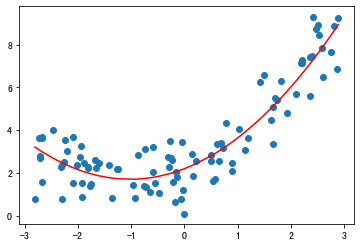

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()

In [13]:
lin_reg.coef_

array([0.        , 0.96436017, 0.47041111])

In [14]:
lin_reg.intercept_

2.1970359535874127

## 关于PolynomialFeatures

In [15]:
X = np.arange(1,11).reshape(-1,2)

In [16]:
X.shape

(5, 2)

In [17]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [24]:
poly = PolynomialFeatures(degree=3) # 最高3次幂
poly.fit(X)
X3 = poly.transform(X)

In [25]:
X3.shape

(5, 10)

In [26]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## pipeline

In [27]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape((-1,1))
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

In [29]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

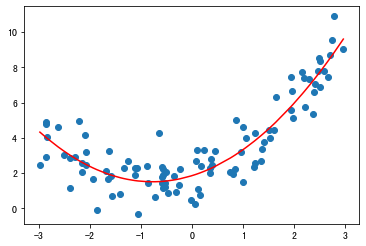

In [30]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()